In [1]:
### I read the entire 700 page code book
# see 
# https://www2.census.gov/library/publications/cen2010/doc/sf1.pdf

In [2]:
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import sys
print(sys.version)
%matplotlib inline

3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [3]:
df = pd.read_csv('nc_geo_cleaned.csv', sep=',', names=['sf', 'st', 'a', 'b', 'c', 'location'], dtype=str)

In [4]:
df.head()

,sf,st,a,b,c,location
0,SF1ST,NC,40,00,0,North Carolina
1,SF1ST,NC,40,89,0,North Carolina
2,SF1ST,NC,40,90,0,North Carolina
3,SF1ST,NC,40,91,0,North Carolina
4,SF1ST,NC,40,92,0,North Carolina


In [5]:
q = "select * from df where location like '%County';"

In [6]:
###We can see from this set that the County keys are NOT unique.  We'll have to run the 
###Analysis using the index as keys.  The best way to do that is by using pandas 
### and calling with df.iloc

In [7]:
nc_geo = df

In [8]:
nc_geo.head()

,sf,st,a,b,c,location
0,SF1ST,NC,40,00,0,North Carolina
1,SF1ST,NC,40,89,0,North Carolina
2,SF1ST,NC,40,90,0,North Carolina
3,SF1ST,NC,40,91,0,North Carolina
4,SF1ST,NC,40,92,0,North Carolina


In [9]:
nc_county_map = pd.read_csv('nc_dist_county_map.csv', sep = ',')

In [10]:
nc_county_map.head()


,County,Congressional_District,District_of_Concern
0,Alamance County,6,no concerns
1,Alexander County,5,no concerns
2,Alleghany County,5,no concerns
3,Anson County,9,no concerns
4,Ashe County,5,no concerns


In [11]:
nc_geo.shape

(344482, 6)

In [12]:
p10 = pd.read_csv('./Cleaned_Data_With_Text_Headers/NC_clean_with_text_headers/nc_p10_2010.csv', sep = '\t')

In [13]:
p10.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_five_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Some_Other_Race,White__Black_or_African_American__American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__Black_or_African_American__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_six_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race
0,SF1ST,NC,0,4,1,7253848,7155579,5155756,1497453,87111,...,7,141,118,15,1,1,2,4,16,16
1,SF1ST,NC,0,4,2,6315,5936,1214,29,4563,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,NC,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,NC,0,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,NC,0,4,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
### get the list of indices that correspond to County data
nc_geo.columns

Index(['sf', 'st', 'a', 'b', 'c', 'location'], dtype='object')

In [15]:
a = nc_geo[nc_geo['location'].str.contains("County")==True]
b = a[a['location'].str.contains("(part)")==False]
c = b[b['location'].str.contains("Schools")==False].index.values.tolist()

/Users/nicholeh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [16]:
c

[19,
 5007,
 6256,
 7271,
 9073,
 10794,
 12404,
 15439,
 16561,
 18924,
 25586,
 32915,
 36379,
 41248,
 44291,
 44632,
 48952,
 49958,
 55688,
 58138,
 60828,
 61451,
 62394,
 66170,
 69447,
 73255,
 81177,
 81989,
 84327,
 90311,
 91576,
 95108,
 100737,
 103183,
 111945,
 113969,
 120460,
 120971,
 122123,
 124333,
 125115,
 137445,
 140271,
 143511,
 147332,
 152042,
 153170,
 155026,
 156047,
 161898,
 165699,
 170181,
 171184,
 173258,
 175772,
 177841,
 180034,
 183010,
 185298,
 186657,
 201185,
 202492,
 204288,
 208402,
 212054,
 217611,
 218796,
 223557,
 226559,
 227751,
 228995,
 231277,
 231873,
 233783,
 238487,
 239647,
 244223,
 246448,
 252953,
 256145,
 260918,
 264460,
 266922,
 269011,
 271540,
 273184,
 276631,
 278095,
 280239,
 280733,
 286473,
 288306,
 304796,
 305742,
 306452,
 309114,
 313024,
 316892,
 319547,
 320861,
 326536,
 326537,
 326770,
 326862,
 326937,
 327029,
 327138,
 327141,
 327142,
 327143,
 327144,
 327147,
 327150,
 327153,
 327158,
 327

In [17]:
indices = []
indices = [0]
for county in c:
    indices.append(county)
indices

[0,
 19,
 5007,
 6256,
 7271,
 9073,
 10794,
 12404,
 15439,
 16561,
 18924,
 25586,
 32915,
 36379,
 41248,
 44291,
 44632,
 48952,
 49958,
 55688,
 58138,
 60828,
 61451,
 62394,
 66170,
 69447,
 73255,
 81177,
 81989,
 84327,
 90311,
 91576,
 95108,
 100737,
 103183,
 111945,
 113969,
 120460,
 120971,
 122123,
 124333,
 125115,
 137445,
 140271,
 143511,
 147332,
 152042,
 153170,
 155026,
 156047,
 161898,
 165699,
 170181,
 171184,
 173258,
 175772,
 177841,
 180034,
 183010,
 185298,
 186657,
 201185,
 202492,
 204288,
 208402,
 212054,
 217611,
 218796,
 223557,
 226559,
 227751,
 228995,
 231277,
 231873,
 233783,
 238487,
 239647,
 244223,
 246448,
 252953,
 256145,
 260918,
 264460,
 266922,
 269011,
 271540,
 273184,
 276631,
 278095,
 280239,
 280733,
 286473,
 288306,
 304796,
 305742,
 306452,
 309114,
 313024,
 316892,
 319547,
 320861,
 326536,
 326537,
 326770,
 326862,
 326937,
 327029,
 327138,
 327141,
 327142,
 327143,
 327144,
 327147,
 327150,
 327153,
 327158,


In [18]:
len(indices)

393

In [19]:
p10.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_five_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Some_Other_Race,White__Black_or_African_American__American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__Black_or_African_American__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_six_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race
0,SF1ST,NC,0,4,1,7253848,7155579,5155756,1497453,87111,...,7,141,118,15,1,1,2,4,16,16
1,SF1ST,NC,0,4,2,6315,5936,1214,29,4563,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,NC,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,NC,0,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,NC,0,4,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
p10.columns

Index(['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO', 'Total',
       'Population_of_one_race', 'White_alone',
       'Black_or_African_American_alone',
       'American_Indian_and_Alaska_Native_alone', 'Asian_alone',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone',
       'Some_Other_Race_alone', 'Two_or_More_Races', 'Population_of_two_races',
       'White__Black_or_African_American',
       'White__American_Indian_and_Alaska_Native', 'White__Asian',
       'White__Native_Hawaiian_and_Other_Pacific_Islander',
       'White__Some_Other_Race',
       'Black_or_African_American__American_Indian_and_Alaska_Native',
       'Black_or_African_American__Asian',
       'Black_or_African_American__Native_Hawaiian_and_Other_Pacific_Islander',
       'Black_or_African_American__Some_Other_Race',
       'American_Indian_and_Alaska_Native__Asian',
       'American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander',
       'American_Indian_and_Alaska_Native__Some_

In [21]:
p8 = pd.read_csv('./Cleaned_Data_With_Text_Headers/NC_clean_with_text_headers/nc_p8_2010.csv', sep = '\t')

In [22]:
p8.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_five_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Some_Other_Race,White__Black_or_African_American__American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__Black_or_African_American__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_six_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race
0,SF1ST,NC,0,3,1,9535483,9329284,6528950,2048628,122110,...,7,202,165,22,2,7,2,4,23,23
1,SF1ST,NC,0,3,2,9018,8375,1437,39,6745,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,NC,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,NC,0,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,NC,0,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
p8.columns
p8_cols = ['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO','Total','White_alone','Black_or_African_American_alone','Asian_alone']

In [24]:
p8_edited = p8[p8_cols]

In [25]:
p8_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone
0,SF1ST,NC,0,3,1,9535483,6528950,2048628,208962
1,SF1ST,NC,0,3,2,9018,1437,39,33
2,SF1ST,NC,0,3,3,0,0,0,0
3,SF1ST,NC,0,3,4,0,0,0,0
4,SF1ST,NC,0,3,5,0,0,0,0


In [26]:
#p8 is highly complex, D4D only wanted high level data, so let's use p3
p3 = pd.read_csv('./Cleaned_Data_With_Text_Headers/NC_clean_with_text_headers/nc_p3_2010.csv', sep = '\t')

In [27]:
p3.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,Asian_alone,Native_Hawaiian_and_Other_Pacific_Islander_alone,Some_Other_Race_alone,Two_or_More_Races
0,SF1ST,NC,0,3,1,9535483,6528950,2048628,122110,208962,6604,414030,206199
1,SF1ST,NC,0,3,2,9018,1437,39,6745,33,2,119,643
2,SF1ST,NC,0,3,3,0,0,0,0,0,0,0,0
3,SF1ST,NC,0,3,4,0,0,0,0,0,0,0,0
4,SF1ST,NC,0,3,5,0,0,0,0,0,0,0,0


In [28]:
p3.shape

(344482, 13)

In [29]:
p3_edited = p3[p8_cols]

In [30]:
p3_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone
0,SF1ST,NC,0,3,1,9535483,6528950,2048628,208962
1,SF1ST,NC,0,3,2,9018,1437,39,33
2,SF1ST,NC,0,3,3,0,0,0,0
3,SF1ST,NC,0,3,4,0,0,0,0
4,SF1ST,NC,0,3,5,0,0,0,0


In [31]:
p8.columns

Index(['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO', 'Total',
       'Population_of_one_race', 'White_alone',
       'Black_or_African_American_alone',
       'American_Indian_and_Alaska_Native_alone', 'Asian_alone',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone',
       'Some_Other_Race_alone', 'Two_or_More_Races', 'Population_of_two_races',
       'White__Black_or_African_American',
       'White__American_Indian_and_Alaska_Native', 'White__Asian',
       'White__Native_Hawaiian_and_Other_Pacific_Islander',
       'White__Some_Other_Race',
       'Black_or_African_American__American_Indian_and_Alaska_Native',
       'Black_or_African_American__Asian',
       'Black_or_African_American__Native_Hawaiian_and_Other_Pacific_Islander',
       'Black_or_African_American__Some_Other_Race',
       'American_Indian_and_Alaska_Native__Asian',
       'American_Indian_and_Alaska_Native__Native_and_Other_Pacific_Islander',
       'American_Indian_and_Alaska_Native__Some_Other_Rac

In [32]:
### p3 doesn't include latinos, but p4 does
p4 = pd.read_csv('./Cleaned_Data_With_Text_Headers/NC_clean_with_text_headers/nc_p4_2010.csv', sep = '\t')

In [33]:
p4.columns

Index(['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO', 'Total',
       'Not_Hispanic_or_Latino_', 'Hispanic_or_Latino'],
      dtype='object')

In [34]:
p4.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Not_Hispanic_or_Latino_,Hispanic_or_Latino
0,SF1ST,NC,0,3,1,9535483,8735363,800120
1,SF1ST,NC,0,3,2,9018,8467,551
2,SF1ST,NC,0,3,3,0,0,0
3,SF1ST,NC,0,3,4,0,0,0
4,SF1ST,NC,0,3,5,0,0,0


In [35]:
#p5 combines race and latino origin
p5 = pd.read_csv('./Cleaned_Data_With_Text_Headers/NC_clean_with_text_headers/nc_p5_2010.csv', sep = '\t')

In [36]:
p5.head()


,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,Some_Other_Race_alone,Two_or_More_Races,Hispanic_or_Latino_,White_alone.1,Black_or_African_American_alone.1,American_Indian_and_Alaska_Native_alone.1,Asian_alone.1,Native_Hawaiian_and_Other_Pacific_Islander_alone_.1,Some_Other_Race_alone.1,Two_or_More_Races.1
0,SF1ST,NC,0,3,1,9535483,8735363,6223995,2019854,108829,...,15088,155759,800120,304955,28774,13281,2383,1345,398942,50440
1,SF1ST,NC,0,3,2,9018,8467,1376,39,6443,...,2,572,551,61,0,302,0,0,117,71
2,SF1ST,NC,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,NC,0,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,NC,0,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
p5.columns

Index(['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO', 'Total',
       'Not_Hispanic_or_Latino', 'White_alone',
       'Black_or_African_American_alone',
       'American_Indian_and_Alaska_Native_alone', 'Asian_alone',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone_',
       'Some_Other_Race_alone', 'Two_or_More_Races', 'Hispanic_or_Latino_',
       'White_alone.1', 'Black_or_African_American_alone.1',
       'American_Indian_and_Alaska_Native_alone.1', 'Asian_alone.1',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone_.1',
       'Some_Other_Race_alone.1', 'Two_or_More_Races.1'],
      dtype='object')

In [38]:
p5[['Not_Hispanic_or_Latino', 'White_alone',
       'Black_or_African_American_alone',
       'Asian_alone',
       'Hispanic_or_Latino_',
       'White_alone.1', 'Black_or_African_American_alone.1',
       'American_Indian_and_Alaska_Native_alone.1', 'Asian_alone.1']]

,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,White_alone.1,Black_or_African_American_alone.1,American_Indian_and_Alaska_Native_alone.1,Asian_alone.1
0,8735363,6223995,2019854,206579,800120,304955,28774,13281,2383
1,8467,1376,39,33,551,61,0,302,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,527141,235743,196095,8574,49348,18039,3735,1531,227
7,0,0,0,0,0,0,0,0,0
8,8031604,5716241,1851697,203157,745157,288530,27538,12140,2272
9,3206221,1843488,1129227,137006,375075,141305,18056,5682,1202


In [39]:
indices

[0,
 19,
 5007,
 6256,
 7271,
 9073,
 10794,
 12404,
 15439,
 16561,
 18924,
 25586,
 32915,
 36379,
 41248,
 44291,
 44632,
 48952,
 49958,
 55688,
 58138,
 60828,
 61451,
 62394,
 66170,
 69447,
 73255,
 81177,
 81989,
 84327,
 90311,
 91576,
 95108,
 100737,
 103183,
 111945,
 113969,
 120460,
 120971,
 122123,
 124333,
 125115,
 137445,
 140271,
 143511,
 147332,
 152042,
 153170,
 155026,
 156047,
 161898,
 165699,
 170181,
 171184,
 173258,
 175772,
 177841,
 180034,
 183010,
 185298,
 186657,
 201185,
 202492,
 204288,
 208402,
 212054,
 217611,
 218796,
 223557,
 226559,
 227751,
 228995,
 231277,
 231873,
 233783,
 238487,
 239647,
 244223,
 246448,
 252953,
 256145,
 260918,
 264460,
 266922,
 269011,
 271540,
 273184,
 276631,
 278095,
 280239,
 280733,
 286473,
 288306,
 304796,
 305742,
 306452,
 309114,
 313024,
 316892,
 319547,
 320861,
 326536,
 326537,
 326770,
 326862,
 326937,
 327029,
 327138,
 327141,
 327142,
 327143,
 327144,
 327147,
 327150,
 327153,
 327158,


In [40]:
p5_edited = p5[['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO','Total',
    'White_alone','Black_or_African_American_alone','Asian_alone','Hispanic_or_Latino_']].ix[indices]

In [41]:
p5_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_
0,SF1ST,NC,0,3,1,9535483,6223995,2019854,206579,800120
19,SF1ST,NC,0,3,20,151131,101718,27985,1806,16639
5007,SF1ST,NC,0,3,5008,37198,32671,2025,357,1601
6256,SF1ST,NC,0,3,6257,11155,9862,133,53,1004
7271,SF1ST,NC,0,3,7272,26948,12344,13038,281,812


In [42]:
def percentages(df):
    df['caucasian_percentage'] = df['White_alone']/df['Total']
    df['african_percentage'] = df['Black_or_African_American_alone']/df['Total']
    df['asian_percentage'] = df['Asian_alone']/df['Total']
    df['latino_percentage'] = df['Hispanic_or_Latino_']/df['Total']
    return df

p5_percent = p5_edited.apply(percentages, axis=1)

In [43]:
p5_percent.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
0,SF1ST,NC,0,3,1,9535483,6223995,2019854,206579,800120,0.652719,0.211825,0.021664,0.083910
19,SF1ST,NC,0,3,20,151131,101718,27985,1806,16639,0.673045,0.185170,0.011950,0.110097
5007,SF1ST,NC,0,3,5008,37198,32671,2025,357,1601,0.878300,0.054438,0.009597,0.043040
6256,SF1ST,NC,0,3,6257,11155,9862,133,53,1004,0.884088,0.011923,0.004751,0.090004
7271,SF1ST,NC,0,3,7272,26948,12344,13038,281,812,0.458067,0.483821,0.010427,0.030132


In [44]:
p5_percent.tail()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
342233,SF1ST,NC,0,3,342234,40271,32795,729,339,2038,0.814358,0.018102,0.008418,0.050607
342270,SF1ST,NC,0,3,342271,13981,9168,75,66,540,0.655747,0.005364,0.004721,0.038624
342296,SF1ST,NC,0,3,342297,27444,25341,327,131,688,0.923371,0.011915,0.004773,0.025069
342310,SF1ST,NC,0,3,342311,10587,10080,64,24,258,0.952111,0.006045,0.002267,0.024370
342319,SF1ST,NC,0,3,342320,8861,7942,17,29,194,0.896287,0.001919,0.003273,0.021894


In [45]:
p5_w_county_name = pd.concat([nc_geo['location'].ix[indices], p5_percent], axis=1)

In [46]:
p5_w_county_name.head()

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
0,North Carolina,SF1ST,NC,0,3,1,9535483,6223995,2019854,206579,800120,0.652719,0.211825,0.021664,0.083910
19,Alamance County,SF1ST,NC,0,3,20,151131,101718,27985,1806,16639,0.673045,0.185170,0.011950,0.110097
5007,Alexander County,SF1ST,NC,0,3,5008,37198,32671,2025,357,1601,0.878300,0.054438,0.009597,0.043040
6256,Alleghany County,SF1ST,NC,0,3,6257,11155,9862,133,53,1004,0.884088,0.011923,0.004751,0.090004
7271,Anson County,SF1ST,NC,0,3,7272,26948,12344,13038,281,812,0.458067,0.483821,0.010427,0.030132


In [47]:
q = 'select p.*, c.* from p5_w_county_name p join nc_county_map c on c.County = p.location;'

In [48]:
comb = pysqldf(q)
comb.head()

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage,County,Congressional_District,District_of_Concern
0,Alamance County,SF1ST,NC,0,3,20,151131,101718,27985,1806,16639,0.673045,0.185170,0.011950,0.110097,Alamance County,6,no concerns
1,Alexander County,SF1ST,NC,0,3,5008,37198,32671,2025,357,1601,0.878300,0.054438,0.009597,0.043040,Alexander County,5,no concerns
2,Alleghany County,SF1ST,NC,0,3,6257,11155,9862,133,53,1004,0.884088,0.011923,0.004751,0.090004,Alleghany County,5,no concerns
3,Anson County,SF1ST,NC,0,3,7272,26948,12344,13038,281,812,0.458067,0.483821,0.010427,0.030132,Anson County,9,no concerns
4,Ashe County,SF1ST,NC,0,3,9074,27281,25420,148,105,1311,0.931784,0.005425,0.003849,0.048055,Ashe County,5,no concerns


In [49]:
comb.tail()
#comb_all = pd.concat([p5_w_county_name.ix[0],comb], axis =1)

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage,County,Congressional_District,District_of_Concern
417,Jackson County,SF1ST,NC,0,3,342234,40271,32795,729,339,2038,0.814358,0.018102,0.008418,0.050607,Jackson County,11,no concerns
418,Swain County,SF1ST,NC,0,3,342271,13981,9168,75,66,540,0.655747,0.005364,0.004721,0.038624,Swain County,11,no concerns
419,Cherokee County,SF1ST,NC,0,3,342297,27444,25341,327,131,688,0.923371,0.011915,0.004773,0.025069,Cherokee County,11,no concerns
420,Clay County,SF1ST,NC,0,3,342311,10587,10080,64,24,258,0.952111,0.006045,0.002267,0.024370,Clay County,11,no concerns
421,Graham County,SF1ST,NC,0,3,342320,8861,7942,17,29,194,0.896287,0.001919,0.003273,0.021894,Graham County,11,no concerns


In [50]:
nc_county_map.head()

,County,Congressional_District,District_of_Concern
0,Alamance County,6,no concerns
1,Alexander County,5,no concerns
2,Alleghany County,5,no concerns
3,Anson County,9,no concerns
4,Ashe County,5,no concerns


In [51]:
comb.shape

(422, 18)

In [52]:
comb_all = pd.concat([pd.DataFrame(p5_w_county_name.ix[0]).T,comb], axis =0)

In [53]:
comb_all.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,STUSAB,Total,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location
0,206579,2019854,0,3,NaN,NaN,NaN,SF1ST,800120,1,NC,9535483,6223995,0.211825,0.0216642,0.652719,0.0839098,North Carolina
0,1806,27985,0,3,6.0,Alamance County,no concerns,SF1ST,16639,20,NC,151131,101718,0.18517,0.0119499,0.673045,0.110097,Alamance County
1,357,2025,0,3,5.0,Alexander County,no concerns,SF1ST,1601,5008,NC,37198,32671,0.0544384,0.00959729,0.8783,0.0430399,Alexander County
2,53,133,0,3,5.0,Alleghany County,no concerns,SF1ST,1004,6257,NC,11155,9862,0.0119229,0.00475123,0.884088,0.0900045,Alleghany County
3,281,13038,0,3,9.0,Anson County,no concerns,SF1ST,812,7272,NC,26948,12344,0.483821,0.0104275,0.458067,0.0301321,Anson County


In [54]:
dists = pd.concat([pd.DataFrame(p5_w_county_name.ix[0]).T,comb_all[comb_all['District_of_Concern'] == 'dist of concern']], axis = 0)

In [55]:
dists.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,STUSAB,Total,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location
0,206579,2019854,0,3,NaN,NaN,NaN,SF1ST,800120,1,NC,9535483,6223995,0.211825,0.0216642,0.652719,0.0839098,North Carolina
7,103,13252,0,3,1.0,Bertie County,dist of concern,SF1ST,267,15440,NC,21282,7393,0.622686,0.00483977,0.347383,0.0125458,Bertie County
34,12180,100260,0,3,1.0,Durham County,dist of concern,SF1ST,36077,95109,NC,267587,112697,0.374682,0.0455179,0.42116,0.134823,Durham County
36,113,32318,0,3,1.0,Edgecombe County,dist of concern,SF1ST,2104,100738,NC,56552,21360,0.571474,0.00199816,0.377705,0.0372047,Edgecombe County
40,17,4040,0,3,1.0,Gates County,dist of concern,SF1ST,173,120461,NC,12197,7684,0.331229,0.00139379,0.629991,0.0141838,Gates County


In [56]:
dists[['location','african_percentage','asian_percentage','caucasian_percentage','latino_percentage']]

,location,african_percentage,asian_percentage,caucasian_percentage,latino_percentage
0,North Carolina,0.211825,0.0216642,0.652719,0.0839098
7,Bertie County,0.622686,0.00483977,0.347383,0.0125458
34,Durham County,0.374682,0.0455179,0.42116,0.134823
36,Edgecombe County,0.571474,0.00199816,0.377705,0.0372047
40,Gates County,0.331229,0.00139379,0.629991,0.0141838
42,Granville County,0.324688,0.0053575,0.576641,0.0748047
46,Halifax County,0.529996,0.00652758,0.394379,0.0210638
50,Hertford County,0.601767,0.00514816,0.343711,0.0261056
65,Martin County,0.432606,0.00289737,0.521934,0.0313814
67,Mecklenburg County,0.302342,0.0456609,0.506044,0.121727


In [57]:
### isolate the state's demographic proportions
state_tot = dists.ix[0]['Total']
state_asian = dists.ix[0]['asian_percentage']
state_african = dists.ix[0]['african_percentage']
state_caucasian = dists.ix[0]['caucasian_percentage']
state_latino = dists.ix[0]['latino_percentage']

dists['asian_deviation_from_mean'] = dists['asian_percentage'].map(lambda x: x/state_asian )
dists['african_deviation_from_mean'] = dists['african_percentage'].map(lambda x: x/state_african )
dists['caucasian_deviation_from_mean'] = dists['caucasian_percentage'].map(lambda x: x/state_caucasian)
dists['latino_deviation_from_mean'] = dists['latino_percentage'].map(lambda x: x/state_latino)

In [58]:
dists.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,...,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location,asian_deviation_from_mean,african_deviation_from_mean,caucasian_deviation_from_mean,latino_deviation_from_mean
0,206579,2019854,0,3,NaN,NaN,NaN,SF1ST,800120,1,...,6223995,0.211825,0.0216642,0.652719,0.0839098,North Carolina,1.000000,1.000000,1.000000,1.000000
7,103,13252,0,3,1.0,Bertie County,dist of concern,SF1ST,267,15440,...,7393,0.622686,0.00483977,0.347383,0.0125458,Bertie County,0.223399,2.939623,0.532208,0.149516
34,12180,100260,0,3,1.0,Durham County,dist of concern,SF1ST,36077,95109,...,112697,0.374682,0.0455179,0.42116,0.134823,Durham County,2.101062,1.768827,0.645239,1.606767
36,113,32318,0,3,1.0,Edgecombe County,dist of concern,SF1ST,2104,100738,...,21360,0.571474,0.00199816,0.377705,0.0372047,Edgecombe County,0.092233,2.697859,0.578664,0.443389
40,17,4040,0,3,1.0,Gates County,dist of concern,SF1ST,173,120461,...,7684,0.331229,0.00139379,0.629991,0.0141838,Gates County,0.064336,1.563691,0.965179,0.169037


In [59]:
#the deviations from mean look pretty big.  Check out in a bar chart
dists.drop_duplicates(inplace = True)
dists.shape

(54, 22)

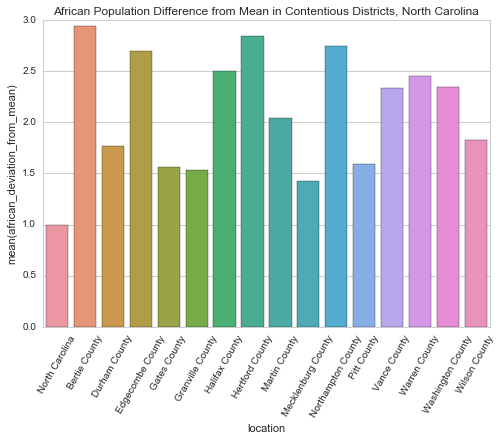

In [67]:
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(x='location', y='african_deviation_from_mean', data = dists)
ax.set_xticklabels(labels=dists['location'],rotation=60)
ax.set_title('African Population Difference from Mean in Contentious Districts, North Carolina')

sns.plt.show()

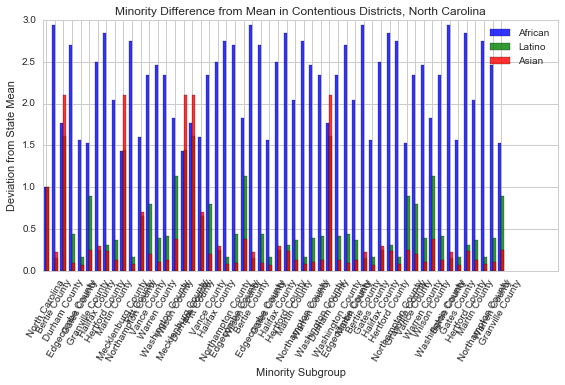

In [70]:
n_groups = dists.shape[0]
african_means = dists['african_deviation_from_mean']
latino_means = dists['latino_deviation_from_mean']
asian_means = dists['asian_deviation_from_mean']
 
# create plot
fig = plt.figure()
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, african_means, bar_width,
                 alpha=opacity,
                 color='b',
                 label='African')
 
rects2 = plt.bar(index + bar_width, latino_means, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Latino')

rects3 = plt.bar(index + bar_width, asian_means, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Asian')
 
plt.xlabel('Minority Subgroup')
plt.ylabel('Deviation from State Mean')
plt.title('Minority Difference from Mean in Contentious Districts, North Carolina')
plt.xticks(index + bar_width, (dists['location']), rotation =60)
plt.legend()
 
plt.tight_layout()
plt.show()